___
# PROJETO 2

____________________________________________________________________________
## Lucas Chen Alba
____________________________________________________________________________

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from matplotlib import pyplot
import numpy as np
from scipy.stats import rv_continuous, gamma

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CD1S17\Projeto 2


_____________________________________________________________________________________________________________________________
## 1 - Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [3]:
dados = pd.read_excel('Life.xlsx')
dados = dados.dropna(subset = ['A1876', 'A1955', 'A2013'])

In [4]:
#Ordenando os dados das colunas: A1876, A1955 e A2013
dados['A1876'] = sorted(dados.A1876)
dados['A1955'] = sorted(dados.A1955)
dados['A2013'] = sorted(dados.A2013)

In [5]:
faixaanos = np.arange(22, 82, 0.5)

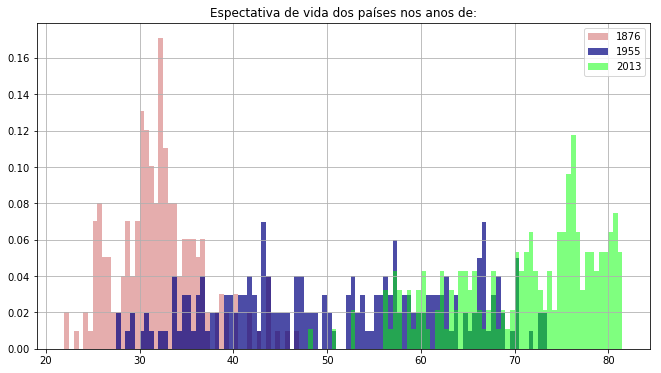

In [272]:
plt.figure(figsize = (11, 6))
dados.A1876.hist(bins = faixaanos, color = "IndianRed", alpha = 0.5, normed = 1, label = '1876')
dados.A1955.hist(bins = faixaanos, color = "Navy", alpha = 0.7, normed = 1, label = '1955')
dados.A2013.hist(bins = faixaanos, color = "Lime", alpha = 0.5, normed = 1, label = '2013')
pyplot.legend(loc = 'best')
plt.title ('Espectativa de vida dos países nos anos de:')

_____________________________________________________________________________________________________________________________
## 2 - Análise Descritiva

In [7]:
dados.A1876.describe()

count    201.000000
mean      31.954359
std        4.732860
min       20.000000
25%       29.200000
50%       31.900000
75%       34.700000
max       46.830000
Name: A1876, dtype: float64

In [8]:
dados.A1955.describe()

count    201.000000
mean      51.577213
std       12.084264
min       27.540000
25%       41.599000
50%       52.740000
75%       61.647000
max       73.440000
Name: A1955, dtype: float64

In [9]:
dados.A2013.describe()

count    201.000000
mean      71.708647
std        7.988072
min       48.300000
25%       65.700000
50%       73.800000
75%       78.100000
max       83.378000
Name: A2013, dtype: float64

___________
Podemos perceber que os dados das espectativas de vida do primeiro e do último ano selecionado (1876 e 2013) possuem dados amostrais que se diferenciam bem menos da média dos dados de 1955, ou seja, o desvio padrão dos anos de 1876 e 2013 são menores do que o desvio padrão dos dados de 1955. Quanto à média dos valores, analisamos que a espectativa de vida sempre tende a crescer, assim como nos diz o senso comum.
_________

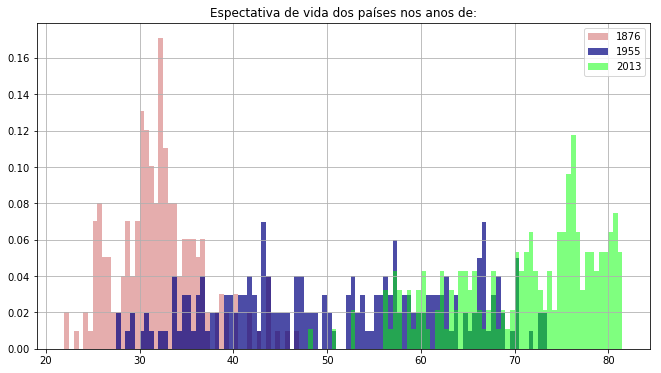

In [265]:
plt.figure(figsize = (11, 6))
dados.A1876.hist(bins = faixaanos, color = "IndianRed", alpha = 0.5, normed = 1, label = '1876')
dados.A1955.hist(bins = faixaanos, color = "Navy", alpha = 0.7, normed = 1, label = '1955')
dados.A2013.hist(bins = faixaanos, color = "Lime", alpha = 0.5, normed = 1, label = '2013')
pyplot.legend(loc = 'best')
plt.title ('Espectativa de vida dos países nos anos de:')

____________
A distribuição dos dados nos 3 anos comportam-se de maneiras diferentes entre si: No ano de 1876 os dados parecem aderir um pouco à distribuição normal, sendo quase simétrica. Os dados de 1955 parecem aderir à uma distribuição uniforme, também sendo simétrica. Já os dados de 2013 parecem aderir à uma distribuição com assimetria negativa.
________

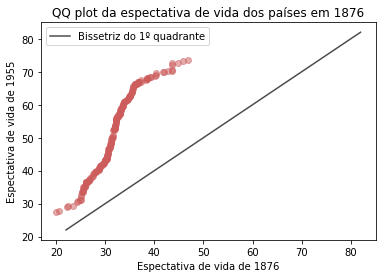

In [11]:
plt.scatter(dados.A1876, dados.A1955, alpha=0.5, label = '', color = 'IndianRed')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

plt.title ('QQ plot da espectativa de vida dos países em 1876')
plt.xlabel('Espectativa de vida de 1876')
plt.ylabel('Espectativa de vida de 1955')
pyplot.legend(loc = 'best')

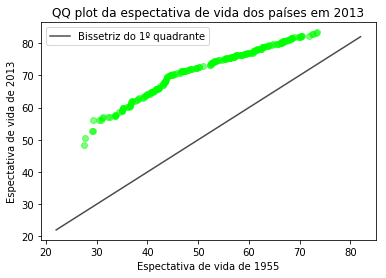

In [12]:
plt.scatter(dados.A1955, dados.A2013, alpha=0.5, label = '', color = 'Lime')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

plt.title ('QQ plot da espectativa de vida dos países em 2013')
plt.xlabel('Espectativa de vida de 1955')
plt.ylabel('Espectativa de vida de 2013')
pyplot.legend(loc = 'best')

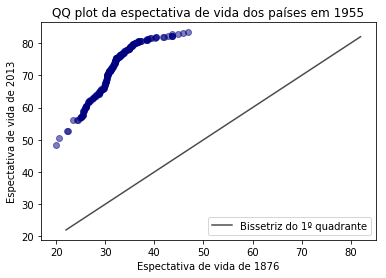

In [13]:
plt.scatter(dados.A1876, dados.A2013, alpha=0.5, label = '', color = 'Navy')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

plt.title ('QQ plot da espectativa de vida dos países em 1955')
plt.xlabel('Espectativa de vida de 1876')
plt.ylabel('Espectativa de vida de 2013')
pyplot.legend(loc = 'best')

______________
Percebemos que todos os pontos criados pela função scatter estão localizados acima da bissetriz, isso se deve ao acontecimento de terem sidos plotados dados do ano mais antigo sempre em x, e como a espectativa de vida apenas tende a aumentar, os pontos ficam sempre acima da bissetriz. Reparamos que nos primeiro gráficos comparamos o primeiro ano analisado com o segundo, e no segundo gráfico, o segundo ano analisado e o terceiro. Em ambos o casos percebemos que houve um aumento na espectativa de vida, pois ambas as 'nuvens' de pontos estão acima da bissetriz. Já no terceiro gráfico, é comparada a espectativa do primeiro ano analisado com o último (1876 com 2013), neste gráfico percebe-se uma distância bem maior da bissetriz, indicando um maior aumento da espectativa.
______________

_____________________________________________________________________________________________________________________________
## 3 - Aderência de um modelo probabilístico normal aos dados

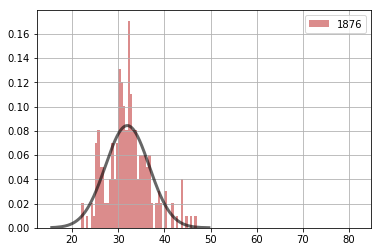

In [273]:
x = sorted(stats.norm.rvs(size = 10000, loc = 31.95, scale = 4.73))
plt.plot(x, stats.norm.pdf(x, loc = 31.95, scale = 4.73), lw = 3, alpha = 0.6, color = 'Black')
dados.A1876.hist(bins = faixaanos, color = "IndianRed", alpha = 0.7, normed = 1, label = '1876')

pyplot.legend(loc = 'best')

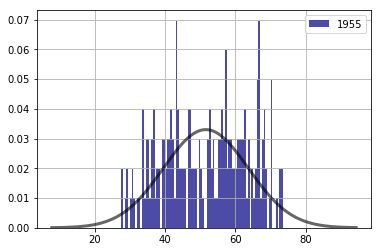

In [15]:
x = sorted(stats.norm.rvs(size = 10000, loc = 51.57, scale = 12.08))
plt.plot(x, stats.norm.pdf(x, loc = 51.57, scale = 12.08), lw = 3, alpha = 0.6, color = 'Black')
dados.A1955.hist(bins = faixaanos, color = "Navy", alpha = 0.7, normed = 1, label = '1955')

pyplot.legend(loc = 'best')

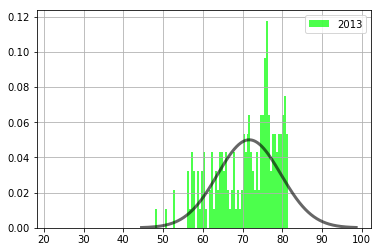

In [16]:
x = sorted(stats.norm.rvs(size = 10000, loc = 71.70, scale = 7.98))
plt.plot(x, stats.norm.pdf(x, loc = 71.70, scale = 7.98), lw = 3, alpha = 0.6, color = 'Black')
dados.A2013.hist(bins = faixaanos, color = "Lime", alpha = 0.7, normed = 1, label = '2013')

pyplot.legend(loc = 'best')

___________
O primeiro gráfico que analisa os dados de 1876 parece ser o único possível de se utilizar a distribuição normal para representar os dados. Os dados dos anos de 1955 e 2013 não parecem se encaixar muito bem neste modelo.
_________________________________________________

In [49]:
freqrelat = []
for i in range (201):
    freqrelat.append ((i-0.5)/201)

In [50]:
freqnormal1876 = []
for i in dados.A1876:
    freqnormal1876.append(stats.norm.cdf (i, loc = 31.95, scale = 4.73))

freqnormal1955 = []
for i in dados.A1955:
    freqnormal1955.append(stats.norm.cdf (i, loc = 51.57, scale = 12.08))

freqnormal2013 = []
for i in dados.A2013:
    freqnormal2013.append(stats.norm.cdf (i, loc = 71.70, scale = 7.98))

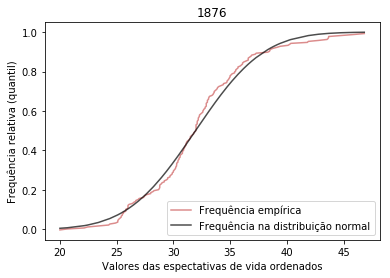

In [51]:
plt.plot (dados.A1876, freqrelat, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dados.A1876, freqnormal1876, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das espectativas de vida ordenados')
plt.title ('1876')

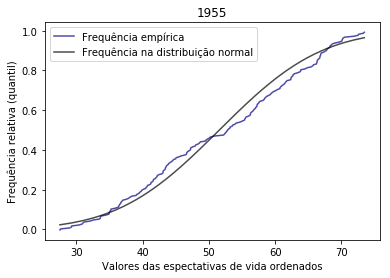

In [52]:
plt.plot (dados.A1955, freqrelat, lw = 1.5, color = 'Navy', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dados.A1955, freqnormal1955, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das espectativas de vida ordenados')
plt.title ('1955')

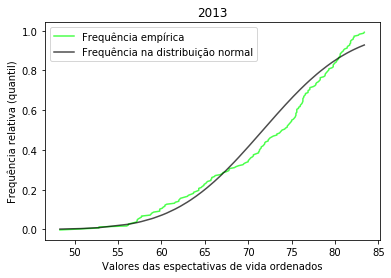

In [53]:
plt.plot (dados.A2013, freqrelat, lw = 1.5, color = 'Lime', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dados.A2013, freqnormal2013, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das espectativas de vida ordenados')
plt.title ('2013')

__________
A partir dos gráficos de frequências relativas empíricas comparadas ás do modelo normal, percebemos que os dados de 1955 e 2013 são os que mais diferem das frequências da distribuição normal. Uma surpresa que aparece nesta análise é que em 1876, onde os dados pareciam encaixar razoavelmente na distribuição normal, com este gráfico de aderência, 1876 não se diferencia tanto assim de 1955 ou 2013, conclusão bastante diferente da conclusão tomada a partir dos gráficos de densidade de probabilidade.
___________

In [54]:
qt1876 = []
for i in freqrelat:
    qt1876.append(stats.norm.ppf (i, loc = 31.95, scale = 4.73))

qt1955 = []
for i in freqrelat:
    qt1955.append(stats.norm.ppf (i, loc = 51.57, scale = 12.08))

qt2013 = []
for i in freqrelat:
    qt2013.append(stats.norm.ppf (i, loc = 71.70, scale = 7.98))

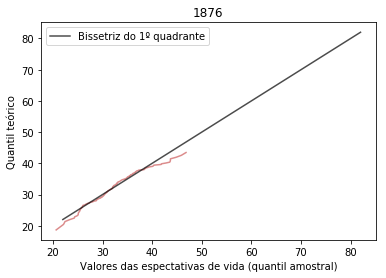

In [55]:
plt.plot (dados.A1876, qt1876, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = '')
#plt.plot (dados.A1876, qt1876, lw = 1.5, color = 'Black', alpha = 0.7, label = '')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

pyplot.legend (loc = 'best')
plt.ylabel ('Quantil teórico')
plt.xlabel ('Valores das espectativas de vida (quantil amostral)')
plt.title ('1876')

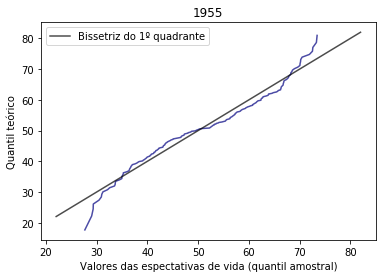

In [56]:
plt.plot (dados.A1955, qt1955, lw = 1.5, color = 'Navy', alpha = 0.7, label = '')
#plt.plot (dados.A1876, qt1876, lw = 1.5, color = 'Black', alpha = 0.7, label = '')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

pyplot.legend (loc = 'best')
plt.ylabel ('Quantil teórico')
plt.xlabel ('Valores das espectativas de vida (quantil amostral)')
plt.title ('1955')

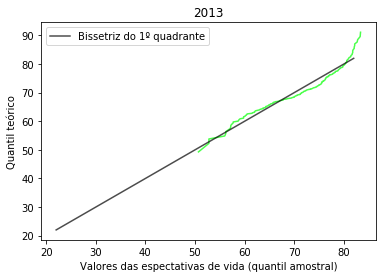

In [57]:
plt.plot (dados.A2013, qt2013, lw = 1.5, color = 'Lime', alpha = 0.7, label = '')
#plt.plot (dados.A1876, qt1876, lw = 1.5, color = 'Black', alpha = 0.7, label = '')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

pyplot.legend (loc = 'best')
plt.ylabel ('Quantil teórico')
plt.xlabel ('Valores das espectativas de vida (quantil amostral)')
plt.title ('2013')

_____________
Nos gráficos acima, os quantis teóricos representam os valores correspondentes a cada 'z' de nossa função, supondo que ela fosse descrita por uma distribuição normal, para isso usamos a função ppf do Scipy. Já no eixo X temos os quantis amostrais, os quais são na realidade os valores correspondentes aos 'z'. Concluindo quanto mais próximos os valores de Y forem de X, melhor as nossas amostras podem ser descritas por uma distribuição normal, em nosso gráfico seria análogo dizer que quanto mais próximo da bissetriz o gráfico estiver, melhor ele é descriro por uma distribuição normal.
_____________

_____________________________________________________________________________________________________________________________
## 4 - Aderência de um modelo probabilístico assimétrico aos dados

In [210]:
stats.gengamma.fit(dados.A2013)


(119.39675631538519,
 3.4354106401659008,
 -226.29061492659503,
 74.128438055670756)

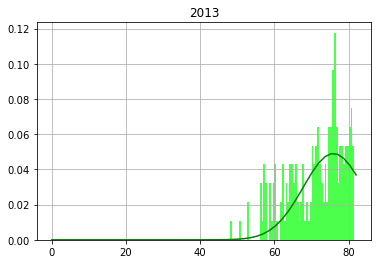

In [277]:
x = np.linspace(0, 82, 50)
gamma = stats.gengamma.pdf(x,119.4,3.4,-226,74)
dados.A2013.hist(bins = faixaanos, color = "Lime", alpha = 0.7, normed = 1, label = '2013')
plt.plot(x, gamma, '-', color='green', label="Gengamma")
plt.title ('2013')

In [242]:
freqgamma2013 = []
for i in dados.A2013:
    freqgamma2013.append(stats.gamma.cdf(i, scale=scale1, loc = loc1, a = a1))


In [243]:
freqgamma2013 = []
for i in dados.A2013:
    freqgamma2013.append(stats.gengamma.cdf(i,119.4,3.4,-226,74))


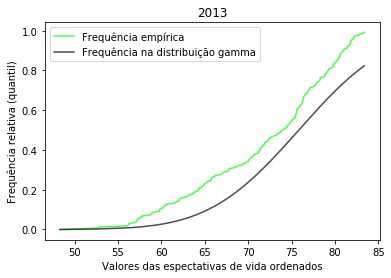

In [244]:
plt.plot (dados.A2013, freqrelat, lw = 1.5, color = 'Lime', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dados.A2013, freqgamma2013, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição gamma')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das espectativas de vida ordenados')
plt.title ('2013')

In [274]:
quartilgamma2013 = []
for i in freqrelat:
    quartilgamma2013.append(stats.gengamma.ppf(i,119.4,3.4,-226,74))

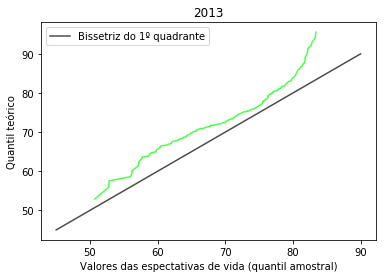

In [276]:
plt.plot (dados.A2013, quartilgamma2013, lw = 1.5, color = 'Lime', alpha = 0.7, label = '')
#plt.plot (dados.A1876, qt1876, lw = 1.5, color = 'Black', alpha = 0.7, label = '')
plt.plot ([45, 90], [45, 90], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

pyplot.legend (loc = 'best')
plt.ylabel ('Quantil teórico')
plt.xlabel ('Valores das espectativas de vida (quantil amostral)')
plt.title ('2013')

A distribuição que testei e mais se aproximou do gráfico da espectativa de vida de 2013 foi a gamma. Apesar de visualmente estar razoavelmente dentro da distribuição gamma, os dados nos mostram que a normal acaba sendo mais adequada do que a gamma, as linhas nos dois gráficos acima estão mais longes das linhas pretas, que representam a adequação perfeita dos dados às distribuições.

Pela análise geral dos gráficos gerados, percebemos que mesmo que forcemos uma distribuição normal sobre um dataset específico, podemos provar empiricamente, e visualmente também, que a normal pode não ser a melhor distribuição para este dataset, precisando assim buscar outra distribuição estatística para descrever e fazer previsões sobre o dataset baseadas neste modelo.

_____________________________________________________________________________________________________________________________
## 5 - Cálculo de probabilidades a partir da distribuição normal

In [63]:
maior_70_1876 = 1 - stats.norm.cdf(70, loc = 31.95, scale = 4.73)
maior_70_1955 = 1 - stats.norm.cdf(70, loc = 51.57, scale = 12.08)
maior_70_2013 = 1 - stats.norm.cdf(70, loc = 71.70, scale = 7.98)

In [64]:
maior_70_1876 = maior_70_1876 *100
maior_70_1955 = maior_70_1955 *100
maior_70_2013 = maior_70_2013 *100

In [65]:
print ('Probabilidade de um país de 1876 ter espectativa de vida > 70 anos:', maior_70_1876, '%')

Probabilidade de um país de 1876 ter espectativa de vida > 70 anos: 4.4408920985e-14 %


In [66]:
print ('Probabilidade de um país de 1995 ter espectativa de vida > 70 anos:', maior_70_1955, '%')

Probabilidade de um país de 1995 ter espectativa de vida > 70 anos: 6.3547000032 %


In [67]:
print ('Probabilidade de um país de 2013 ter espectativa de vida > 70 anos:', maior_70_2013, '%')

Probabilidade de um país de 2013 ter espectativa de vida > 70 anos: 58.4349225197 %


In [68]:
#inf75_1876 = (stats.norm.cdf(75, loc = 31.95, scale = 4.73) - stats.norm.cdf(70, loc = 31.95, scale = 4.73)) / (stats.norm.cdf(47, loc = 31.95, scale = 4.73) - stats.norm.cdf(70, loc = 31.95, scale = 4.73))
inf75_1955 = (stats.norm.cdf(70, loc = 51.57, scale = 12.08) - stats.norm.cdf(70, loc = 51.57, scale = 12.08)) / (stats.norm.cdf(74, loc = 51.57, scale = 12.08) - stats.norm.cdf(70, loc = 51.57, scale = 12.08))
inf75_2013 = (stats.norm.cdf(75, loc = 71.70, scale = 7.98) - stats.norm.cdf(70, loc = 71.70, scale = 7.98)) / (stats.norm.cdf(84, loc = 71.70, scale = 7.98) - stats.norm.cdf(70, loc = 71.70, scale = 7.98))


In [69]:
inf75_1955 = inf75_1955 *100
inf75_2013 = inf75_2013 *100

In [70]:
print ('Probabilidade de um país de 1876 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos:', 0, '%')

Probabilidade de um país de 1876 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos: 0 %


In [71]:
print ('Probabilidade de um país de 1955 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos:', inf75_1955, '%')

Probabilidade de um país de 1955 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos: 0.0 %


In [72]:
print ('Probabilidade de um país de 2013 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos:', inf75_2013, '%')

Probabilidade de um país de 2013 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos: 46.8195178568 %


In [73]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 1876:', stats.norm.ppf(0.10, loc = 31.95, scale = 4.73))

Maior espectativa de vida dos 10% com menor espectativa de 1876: 25.888261095


In [74]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 1955:', stats.norm.ppf(0.10, loc = 51.57, scale = 12.08))

Maior espectativa de vida dos 10% com menor espectativa de 1955: 36.0888570882


In [75]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 2013:', stats.norm.ppf(0.10, loc = 71.70, scale = 7.98))

Maior espectativa de vida dos 10% com menor espectativa de 2013: 61.473218507


In [76]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 1876:', stats.norm.ppf(0.90, loc = 31.95, scale = 4.73))

Menor espectativa de vida dos 10% com maior espectativa de 1876: 38.011738905


In [77]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 1955:', stats.norm.ppf(0.90, loc = 51.57, scale = 12.08))

Menor espectativa de vida dos 10% com maior espectativa de 1955: 67.0511429118


In [78]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 2013:', stats.norm.ppf(0.90, loc = 71.70, scale = 7.98))

Menor espectativa de vida dos 10% com maior espectativa de 2013: 81.926781493
